<h1 style="text-align: center; font-family: Arial"> TP 1 - Séance 1 </h1>
<h2 style="text-align: center; font-family: Arial"> Qualité d'image </h2>

Équipe #0
- Nom, Prénom (Matricule)
- Nom, Prénom (Matricule)

In [39]:
# Importe les modules qui seront utilisés dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

<span style='color: red;'> Attention : Lisez également le fichier Énoncé TP1.pdf que nous vous donnons. Il contient les questions du TP mais également des informations supplémentaires et astuces pour vous aider.  
</span>

# Exercice I: Étude de la résolution
## Mise en place des fonctions

<span style='color: red;'> Attention : tous les fichiers et les images dont vous aurez besoin pour cette séance sont dans le dossier 'fichiers_seance_1'. Vos chemins devront être ajustés en conséquence. 
</span>

**1.** Ouvrez et affichez l'image ```brain_tumor.jpg```. 

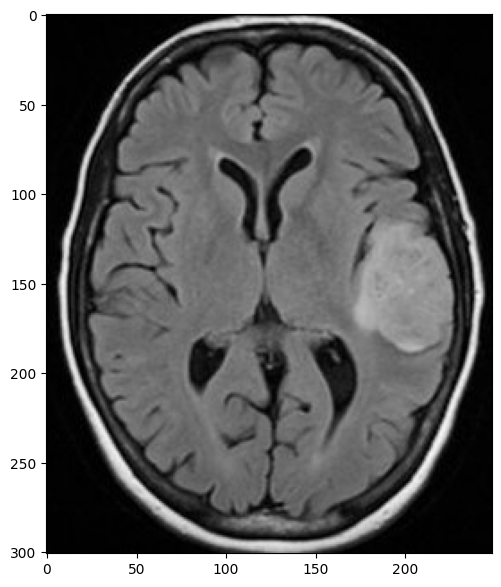

In [40]:
img = imread("fichiers_seance_1/brain_tumor.jpg")
plt.imshow(img)
plt.show()

**2.** Déterminez graphiquement la largeur approximative de la tumeur en pixel (selon l'axe transversal).

Affichez cette largeur sous forme d'une ligne pointillée délimitée par deux points, avec la fonction ```ax.plot(x, y)```. 

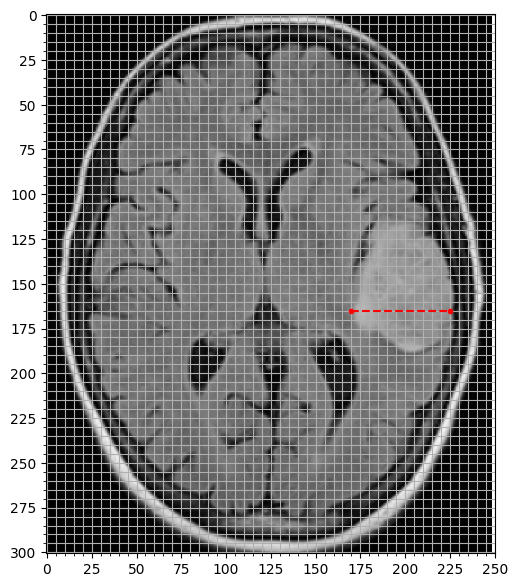

In [41]:
# vous pouvez utiliser ax.imshow(img) puis ax.plot(x, y) pour afficher une image et y superposer des points
# vous pouvez afficher la grille sur l'image avec plt.grid() pour mieux trouver les positions en pixel


fig, ax = plt.subplots(1, 1)
ax.imshow(img)
ax.plot([170, 225], [165, 165], linewidth=1.5, color="red", linestyle="dashed",marker="o", markersize=3)
ax.grid(True, which='both')
ax.set_xticks(np.arange(0, 251, 25));
ax.set_xticks(np.arange(0, 251, 5), minor=True);
ax.set_yticks(np.arange(0, 301, 25));
ax.set_yticks(np.arange(0, 301, 5), minor=True);

**3.** Définissez la méthode ```taillePixel(x0, y0, x1, y1, ref)``` qui calcule la taille physique d'un pixel en millimètre.

In [42]:
def taille_pixel(x0, y0, x1, y1, ref):
    """Calcule la taille d'un pixel en fonction des coordonnées d'un objet et sa taille de référence. On suppose que l'élément de référence est au centre du pixel.
    @param x0 :  La coordonnée x du point 0
    @param y0 :  La coordonnée y du point 0
    @param x1 : La coordonnée x du point 1
    @param y1 : La coordonnée y du point 1
    @param ref : La taille physique en mm de l'objet défini par les points 0 et 1
    @return    La taille physique d'un pixel en millimètre
    """
    return ref/np.sqrt((x1 - x0)**2.0 + (y1 - y0)**2.0)


**4.** La largeur de la tumeur est de 3 cm. Déduisez la largeur d'un pixel en millimètre.

In [43]:
pixel_tumeur=taille_pixel(170, 165, 225, 165, 30)
print(f"La taille du pixel est de {pixel_tumeur} mm.")

La taille du pixel est de 0.5454545454545454 mm.


**5.** Définissez la méthode ```downsample(img, f)```.

In [44]:
def downsample(img, f):
    """Sous-échantillone l'image img d'un facteur f
    @param img  L'image à sous-échantilloner.
    @param f    Le facteur de sous-échantillonage (un pixel sur f est conservé).
    @return     L'image sous-échantillonée: sa taille est celle d'img divisée par f.
    """
   
    return  img[::f, ::f, :]


**6.** Affichez l'image de la tumeur sous-échantillonnée avec ```f=2, 3, 4```. Affichez le facteur de downsampling ainsi que la taille de l'image downsamplée dans le titre de la figure. Comment évolue la largeur d'un pixel lors du sous-échantillonage? Donnez un avantage et un inconvénient de l'utilisation d'une image médicale downsamplée plutôt que l'image pleine résolution. 

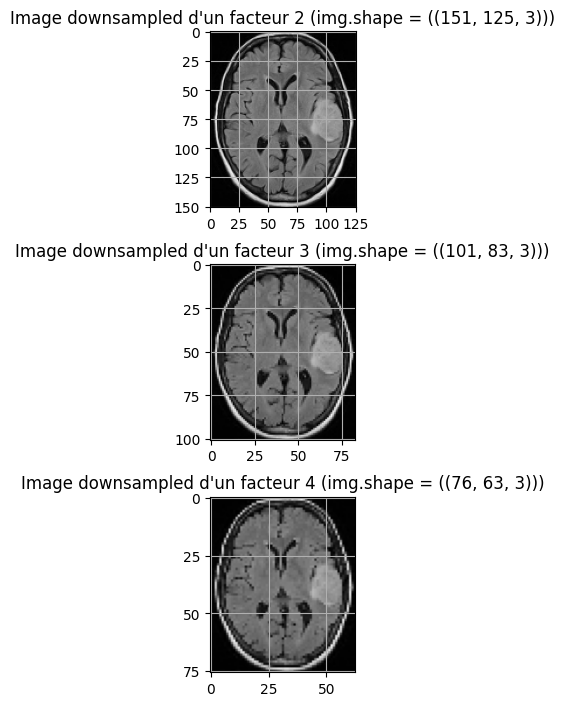

In [45]:
# pour inclure la valeur d'une variable dans un string, vous pouvez utiliser la syntaxe suivante (pour une variable x):
# f"ma variable : {x}"              ou encore
# "ma variable :{:.2f}".format(x)   pour forcer l'affichage à afficher une valeur flottante avec 2 décimales

frequencies = [2, 3, 4]

fig, axes = plt.subplots(3, 1)
fig.tight_layout(h_pad=2.0)

for i, axe in enumerate(axes):
    downsampled_img = downsample(img, frequencies[i])
    axe.imshow(downsampled_img)
    axe.grid(True, which='both')
    axe.set_xticks(np.arange(0, 251/frequencies[i], 25));
    axe.set_yticks(np.arange(0, 301/frequencies[i], 25));
    axe.set_title(f"Image downsampled d'un facteur {frequencies[i]} (img.shape = ({downsampled_img.shape}))")





La taille d'un pixel augmente lorsqu'on sous-échantillonne une image, car la même réalité est numérisée par moins d'éléments. L'avantage d'échantillonner est que les images prennent moins de mémoire, ce qui permet d'en stokcer plus et de les rendre plus facilement manipulables. En contrepartie, on perd de la qualité d'image, ce qui peut les rendre plus difficiles à analyser dans certains contextes.


## Calibration d'un IRM

**7.** Ouvrez et affichez l'image ```resolution.png```. Affichez l'image en niveau de gris, cachez les axes et ajoutez un titre. Par dessus l'image, dessinez des lignes pointillées le long des mires verticales et horizontales. Affichez une légende pour les lignes. 

C:\Users\sophi\AppData\Local\Temp\ipykernel_17756\3921947136.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


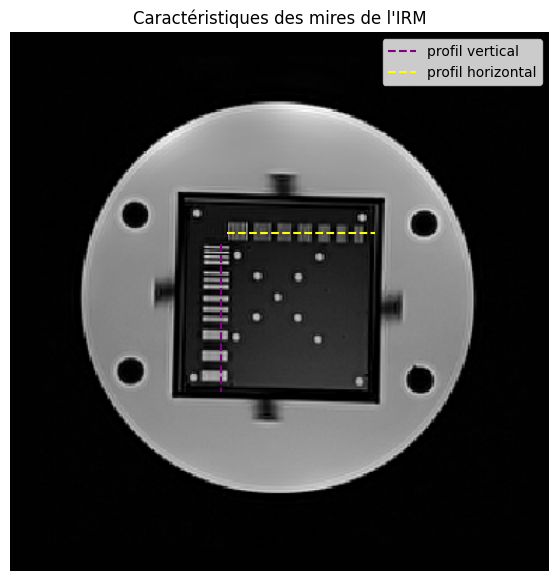

In [46]:
resolution= imread("fichiers_seance_1/resolution.png")

fig, ax = plt.subplots(1, 1)
ax.imshow(resolution, cmap="gray")
ax.set_axis_off()
ax.set_title("Caractéristiques des mires de l'IRM")
ax.plot([200, 200], [201, 341], label="profil vertical", linestyle="dashed", color="purple")
ax.plot([206, 346], [190, 190], label="profil horizontal", linestyle="dashed", color="yellow")
ax.legend()
fig.show()

**8.** La largeur du cube central est de 10 cm. Déduisez la largeur d'un pixel en millimètre.

In [47]:
pixel_IRM = taille_pixel(160, 151, 356, 157, 100)
print(f"La taille du pixel est de {pixel_IRM} mm.")

La taille du pixel est de 0.5099651909640567 mm.


**9.** Quelle est la relation entre la largeur d'un pixel et la taille du plus petit objet observable ? Selon cette relation, quelle serait la taille du plus petit objet observable dans cette image ?



La taille des pixel est proportionnelle à la taille des objets discernables par définition.
(FINIR LA RÉPONSE)

**10.** Afin de vérifier cette relation, affichez les profils d'intensités le long d'axes perpendiculaires aux mires. Utilisez la distance en millimètres comme abscisses. 

Quelle est l'épaisseur des plus petites mires observables? Fiez-vous au tableau 1 et à la figure 3 de l'énoncé. 

Est-ce cohérent avec votre réponse donnée à la question **9** ?

Text(0.5, 1.0, 'Intensité des objets pour le profilage horizontal en à la position verticale y=190')

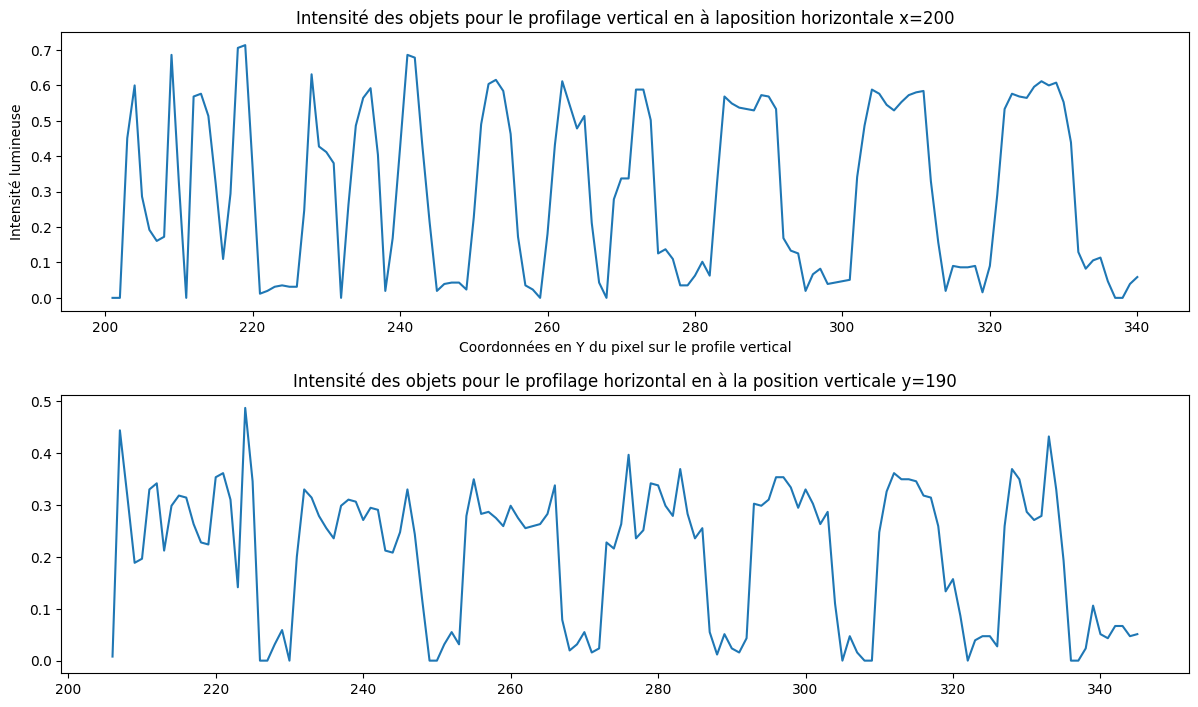

In [48]:
intensite_pixel_vertical = resolution[201:341, 200]
intensite_pixel_horizontal = resolution[190, 206:346]

fig, [ax_vertical, ax_horizontal] = plt.subplots(2, 1)
fig.tight_layout(h_pad=4)

ax_vertical.set_title("Intensité des objets pour le profilage vertical en à laposition horizontale x=200")
ax_vertical.plot(range(201, 341), intensite_pixel_vertical)
ax_vertical.set_ylabel("Intensité lumineuse")
ax_vertical.set_xlabel("Coordonnées en Y du pixel sur le profile vertical")
ax_horizontal.plot(range(206, 346), intensite_pixel_horizontal)
ax_horizontal.set_title("Intensité des objets pour le profilage horizontal en à la position verticale y=190")



On peut distinguer blabla jusqu'à  la mire verticaler de 0,5 mm en descendand, ce qui concorde avec mesure pixels trouvées précédement (À FINIR)

## Mesure de l'épaisseur de coupe

**11.** Affichez les profils d'intensités des 4 rampes et mesurer graphiquement la largeur des gaussiennes à mi-hauteur. 

(Affichez les grilles sur les graphiques et augmenter la fréquence des ticks et la taille de l'image devraient faciliter la mesure).

Text(0.5, 1.0, 'Intensité de la rampe ouest')

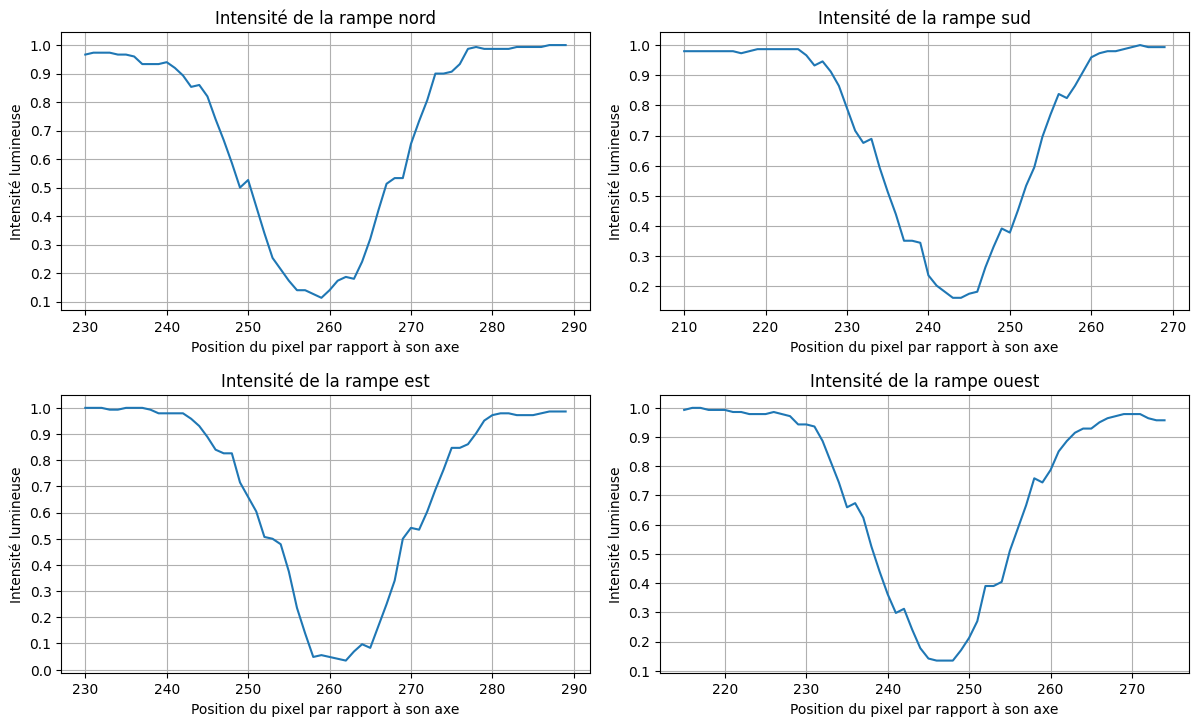

In [56]:
# Définition des listes
intensite_pixel_rampe_N = resolution[140, 230:290]
intensite_pixel_rampe_S = resolution[360, 210:270]
intensite_pixel_rampe_E = resolution[230:290, 365]
intensite_pixel_rampe_O = resolution[215:275, 147]

# Normalisation
intensite_pixel_rampe_N = [value/max(intensite_pixel_rampe_N) for value in intensite_pixel_rampe_N]
intensite_pixel_rampe_S = [value/max(intensite_pixel_rampe_S) for value in intensite_pixel_rampe_S]
intensite_pixel_rampe_E = [value/max(intensite_pixel_rampe_E) for value in intensite_pixel_rampe_E]
intensite_pixel_rampe_O = [value/max(intensite_pixel_rampe_O) for value in intensite_pixel_rampe_O]

fig, axes = plt.subplots(2, 2)
fig.tight_layout(h_pad=4.0, w_pad=2.0)

for column in axes:
    for axe in column:
        axe.set_yticks(np.arange(0.0, 1.1, 0.1));
        axe.grid(True, which='both')
        axe.set_ylabel("Intensité lumineuse")
        axe.set_xlabel("Position du pixel par rapport à son axe")

axes[0, 0].plot(range(230, 290), intensite_pixel_rampe_N)
axes[0, 0].set_title("Intensité de la rampe nord")
axes[0, 1].plot(range(210, 270), intensite_pixel_rampe_S)
axes[0, 1].set_title("Intensité de la rampe sud")
axes[1, 0].plot(range(230, 290), intensite_pixel_rampe_E)
axes[1, 0].set_title("Intensité de la rampe est")
axes[1, 1].plot(range(215, 275), intensite_pixel_rampe_O)
axes[1, 1].set_title("Intensité de la rampe ouest")




**12.** L'épaisseur de la coupe est donnée par $e=\tan(14^\circ) \times FWHM$ où $FWHM$ est la largeur à mi-hauteur en mm. Sachant que les paramètres de l'IRM indiquent une épaisseur de coupe théorique de $2\pm0.3$ mm, passerait-il le controle qualité?

In [62]:
# Lecture graphique x conversion en mm
largeur_nord = (267 - 250 + 1) * pixel_IRM
largeur_sud = (252 - 235 + 1) * pixel_IRM
largeur_est = (269 - 253 + 1) * pixel_IRM
largeur_ouest = (255 - 238 + 1) * pixel_IRM

largeurs = np.array([largeur_nord, largeur_sud, largeur_est, largeur_ouest])
epaisseur_moyenne = np.tan(14 * np.pi/180) * np.mean(largeurs)
erreur_standard_epaisseur = np.tan(14 * np.pi/180) * np.std(largeurs)
print(f"l'épaisseur de la coupe de l'IRM est de {epaisseur_moyenne:.2f} ± {erreur_standard_epaisseur:.2f} mm.")

l'épaisseur de la coupe de l'IRM est de 2.26 ± 0.06 mm.


N'est pas bon, pas dans l'intervalle 2± 0.3 bla bla bla

# Exercice II: Analyse du contraste et du bruit
## Mesure du contraste

In [22]:
# pour étendre l'affichage des figures encore plus, facultatif !
plt.rcParams["figure.figsize"] = (20, 7)

**1.** Chargez  et affichez l'image ```oct.png```.

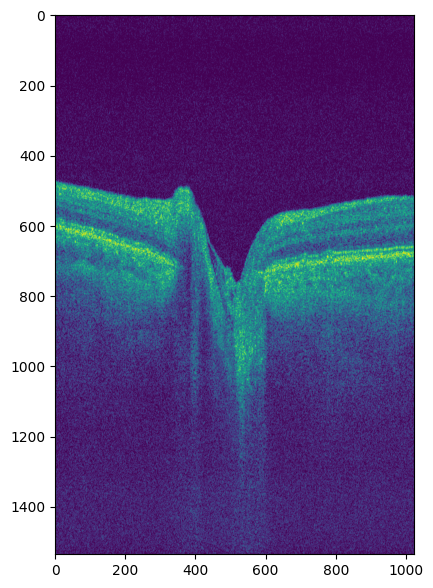

In [63]:
macula = imread("fichiers_seance_1/oct.png")
plt.imshow(macula)
plt.show()

**2.** Chargez  et affichez les segmentations ```mask_choroid_left.npy```, ```mask_choroid_right.npy```, ```mask_rpe_left.npy```, ```mask_rpe_right.npy``` et ```mask_onh.npy```.

C:\Users\sophi\AppData\Local\Temp\ipykernel_17756\300256919.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


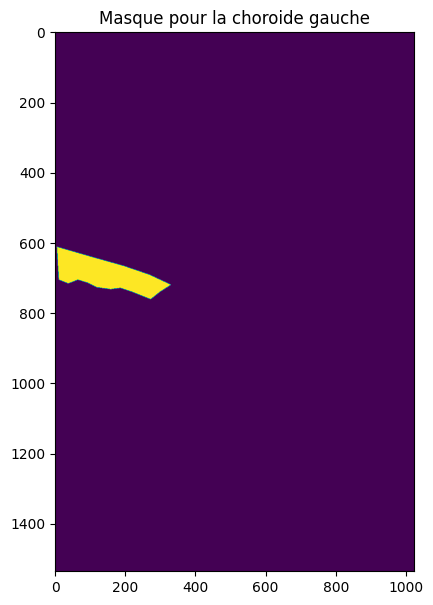

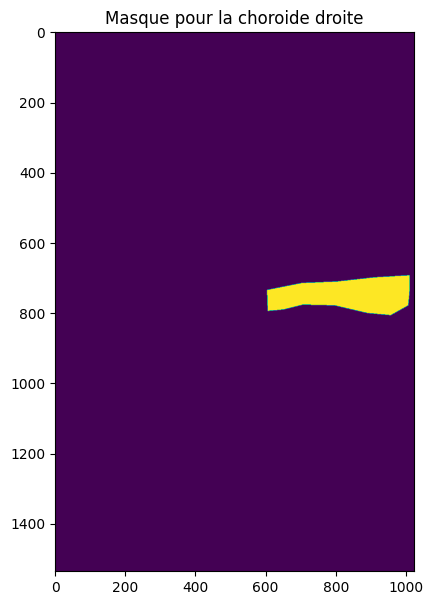

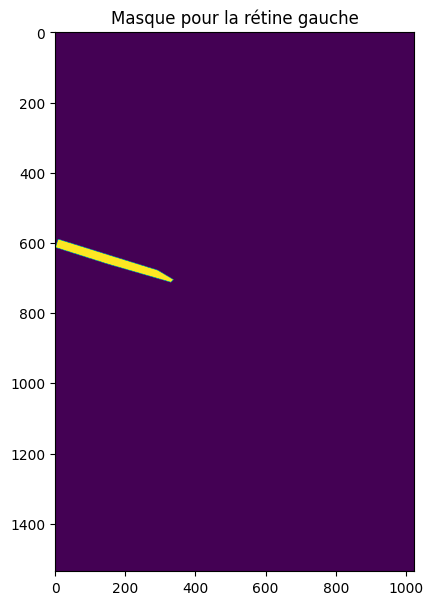

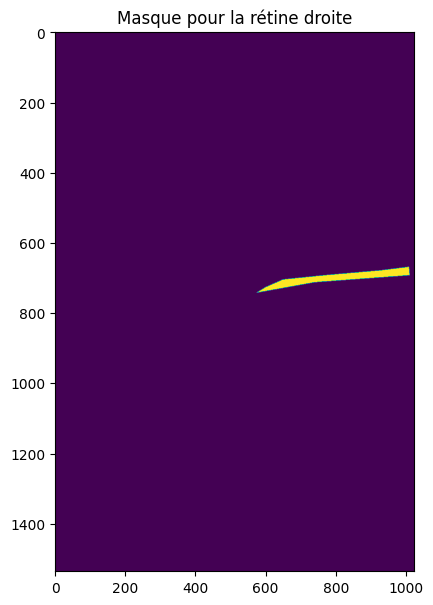

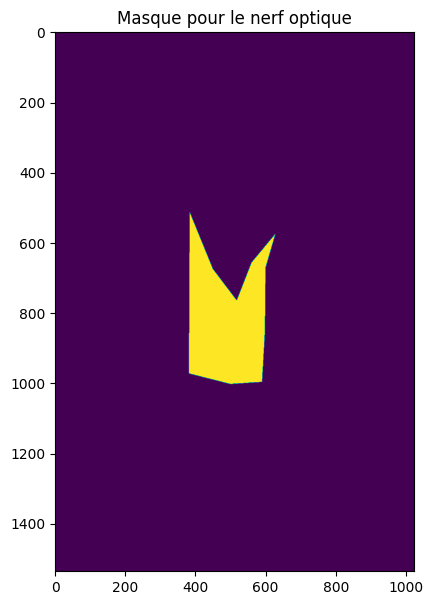

In [71]:
choro_left=np.load("fichiers_seance_1/mask_choroid_left.npy")
choro_right=np.load("fichiers_seance_1/mask_choroid_right.npy")
rpe_left=np.load("fichiers_seance_1/mask_rpe_left.npy")
rpe_right=np.load("fichiers_seance_1/mask_rpe_right.npy")
onh=np.load("fichiers_seance_1/mask_onh.npy")

for img, title in [(choro_left, "la choroide gauche"), (choro_right,  "la choroide droite"), (rpe_left, "la rétine gauche"), (rpe_right, "la rétine droite"), (onh, "le nerf optique")]:
    fig, ax = plt.subplots()
    ax.set_title(f"Masque pour {title}")
    ax.imshow(img)
    fig.show()


**3.** Regrouper les segmentations de la choroide et de la RPE en un seul masque par région (1 masque pour la choroide, gauche et droite, etc.). Affichez les segmentations regroupées.

C:\Users\sophi\AppData\Local\Temp\ipykernel_17756\2095820501.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


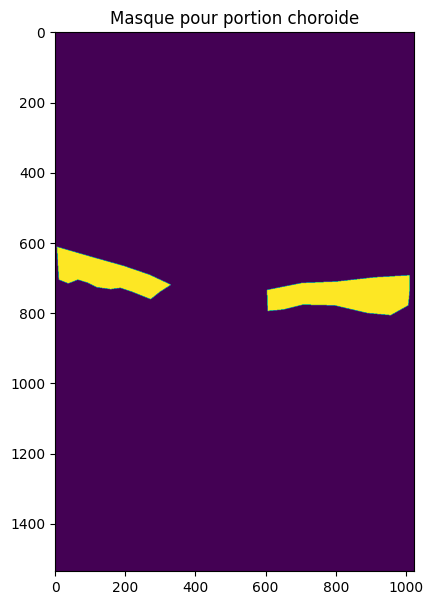

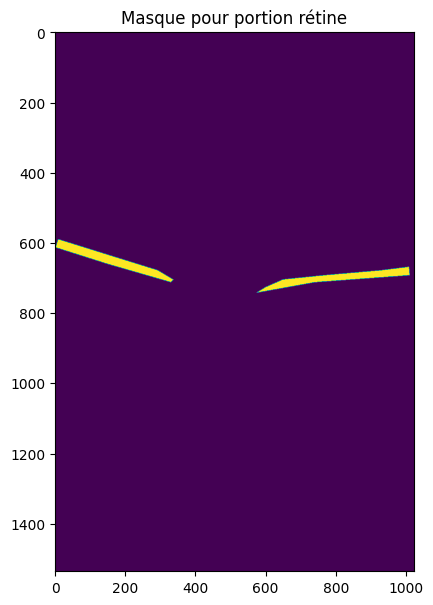

In [78]:
choroide = choro_left | choro_right
retina =  rpe_left | rpe_right

for img, title in [(choroide, "portion choroide"), (retina,  "portion rétine")]:
    fig, ax = plt.subplots()
    ax.set_title(f"Masque pour {title}")
    ax.imshow(img)
    fig.show()

**4.** Utilisez le masque  ```mask_retina.npy ``` pour définir un masque du fond de l'image (et pas de la rétine).

C:\Users\sophi\AppData\Local\Temp\ipykernel_17756\1876212599.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


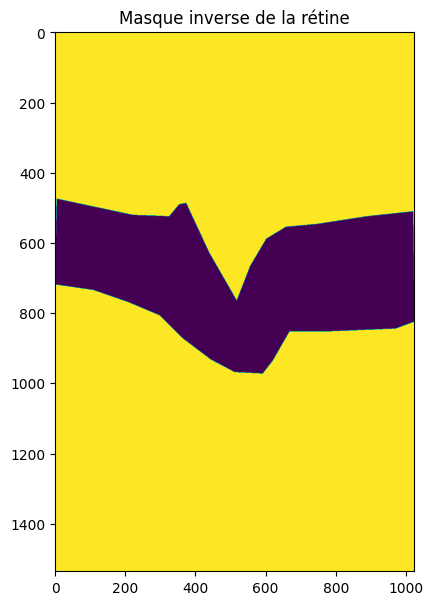

In [79]:
fond = np.logical_not(np.load("fichiers_seance_1/mask_retina.npy"))

fig, ax = plt.subplots()
ax.set_title(f"Masque inverse de la rétine")
ax.imshow(fond)
fig.show()

**5.** Calculez l'intensité moyenne sur ces 3 régions (choroide, RPE et tête du nerf optique) et sur le fond de l'image. En déduire le contraste entre chaque région et le fond de l'image OCT. Quelle est la zone de la rétine où le contraste est le meilleur ?

In [86]:
intensite_moyenne_choroide = np.sum(macula * choroide) / np.sum(choroide)
intensite_moyenne_retina = np.sum(macula * retina) / np.sum(retina)
intensite_moyenne_onh = np.sum(macula * onh) / np.sum(onh)
intensite_moyenne_fond = np.sum(macula * fond) / np.sum(fond)
print(f"L'intensité moyenne de la choroide est {intensite_moyenne_choroide:.2f}, celle de la retine est {intensite_moyenne_retina:.2f}, celle du nerf est {intensite_moyenne_onh:.2f} et celle du fond est {intensite_moyenne_fond:.2f}")

    

L'intensité moyenne de la choroide est 0.48, celle de la retine est 0.70, celle du nerf est 0.40 et celle du fond est 0.09


## Mesure du Rapport Contraste/Bruit

**6.** Ouvrez et affichez les images ```oct.png```, ```oct_2.png```,  ```oct_3.png```, ```oct_4.png```, ```oct_5.png```. 

In [23]:
plt.rcParams["figure.figsize"] = (30, 10)



In [ ]:
np.sum(macula * fond) / np.sum(fond)

**7.** En utilisant la segmentation de la rétine et la segmentation de la région avec le plus grand contraste (question précédente), calculez le CNR en décibel sur ces 5 images. 

**8.** Calculer une image moyenne de ces 5 images, qui sera une estimation de l'image OCT débruitée. Affichez côte à côte une des images originale et l'image moyennée. Quelles différences remarquez-vous ?

**9.** Calculer le CNR sur une des images originales, l'image moyennée calculée à la question précédente, et sur l'image ```ave.png``` fournie. Affichez les trois images côte-à-côte et comparez leurs CNRs. Quelle image obtient le CNR le plus élevé ? 

**10.** Que pouvez-vous conclure sur la technique de moyennage comme technique de débruitage ? (Pourriez-vous utiliser la technique de moyennage en tout temps ? Quelles conditions doivent être respectées pour que la technique fonctionne bien ?)

**8.** Que représente le rapport contraste/bruit? Est-il préférable d'avoir un CNR faible ou fort? 



**9.** Nommez un avantage de calculer le rapport contraste/bruit par rapport au rapport signal/bruit. 